In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
df = pd.read_csv("C:/Users/ALGORITHM/Documents/DATA SET/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Understanding/ Overview

In [5]:
df.shape

(1025, 14)

In [6]:
df.target.value_counts(normalize = True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

##### It has 1025 rows and 14 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Feature Description

##### mapping some variables to their original features

#### Sex
##### Sex = 1 for male and 0 for female

#### cp = Chest pain type
##### 0 =typical angina,  1 = atypical angina,  2 = Non-anginal pain,  3 = Asymptomatic

In [9]:
df.cp.unique()

array([0, 1, 2, 3])

In [10]:
df.cp = df.cp.map({0 :"typical_angina", 1 : "atypical_angina", 2 :"Non_anginal_pain", 3 : "Asymptomatic"})

#### Fbs (Fasting Blood Sugar)
##### 1 = True, 0 = False

In [11]:
df.fbs.unique()

array([0, 1])

#### restecg(resting electrocardiographic results): 
##### 0 = Normal,  1 = ST-T wave abnormality,   2 = Left ventricular hypertrophy)

In [12]:
df.restecg = df.restecg.map({0 : "Normal", 1 : "ST-T wave abnormality", 2 :"Left ventricular hypertrophy"})

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,typical_angina,125,212,0,ST-T wave abnormality,168,0,1.0,2,2,3,0
1,53,1,typical_angina,140,203,1,Normal,155,1,3.1,0,0,3,0
2,70,1,typical_angina,145,174,0,ST-T wave abnormality,125,1,2.6,0,0,3,0
3,61,1,typical_angina,148,203,0,ST-T wave abnormality,161,0,0.0,2,1,3,0
4,62,0,typical_angina,138,294,1,ST-T wave abnormality,106,0,1.9,1,3,2,0


#### exang (exercise-induced angina) Chest pain induced by exercise:
##### 1 = Yes, 0 = No

In [14]:
df.exang.unique()

array([0, 1])

#### Slope: Slope of the peak exercise ST segment: 0 = Up sloping, 1 = Flat, 2 = Down sloping

In [15]:
df.slope.unique()

array([2, 0, 1])

In [16]:
df.slope = df.slope.map({0 :"Up sloping", 1 :" Flat", 2 : "Down sloping"})

#### Thal (Thalassemia status): 1 = Normal, 2 = Fixed defect, 3 = Reversible defect

In [17]:
df.thal.unique()

array([3, 2, 1, 0])

In [18]:
df.thal = df.thal.map({1 : "Normal", 2 : 'Fixed defect', 3 : 'Reversible defect'})

#### Target (The target outcome): 0 = No Heart diseases, 1 = Heart diseases Present

In [19]:
df.target.unique()

array([0, 1])

### Data Cleaning

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,typical_angina,125,212,0,ST-T wave abnormality,168,0,1.0,Down sloping,2,Reversible defect,0
1,53,1,typical_angina,140,203,1,Normal,155,1,3.1,Up sloping,0,Reversible defect,0
2,70,1,typical_angina,145,174,0,ST-T wave abnormality,125,1,2.6,Up sloping,0,Reversible defect,0
3,61,1,typical_angina,148,203,0,ST-T wave abnormality,161,0,0.0,Down sloping,1,Reversible defect,0
4,62,0,typical_angina,138,294,1,ST-T wave abnormality,106,0,1.9,Flat,3,Fixed defect,0


#### Checking for missing values

In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        7
target      0
dtype: int64

In [22]:
mode_value = df['thal'].mode()[0]
df['thal'] = df['thal'].fillna(mode_value)

In [23]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

##### checking for outliers

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,typical_angina,125,212,0,ST-T wave abnormality,168,0,1.0,Down sloping,2,Reversible defect,0
1,53,1,typical_angina,140,203,1,Normal,155,1,3.1,Up sloping,0,Reversible defect,0
2,70,1,typical_angina,145,174,0,ST-T wave abnormality,125,1,2.6,Up sloping,0,Reversible defect,0
3,61,1,typical_angina,148,203,0,ST-T wave abnormality,161,0,0.0,Down sloping,1,Reversible defect,0
4,62,0,typical_angina,138,294,1,ST-T wave abnormality,106,0,1.9,Flat,3,Fixed defect,0


In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [28]:
numerical = ['trestbps', 'chol','thalach']

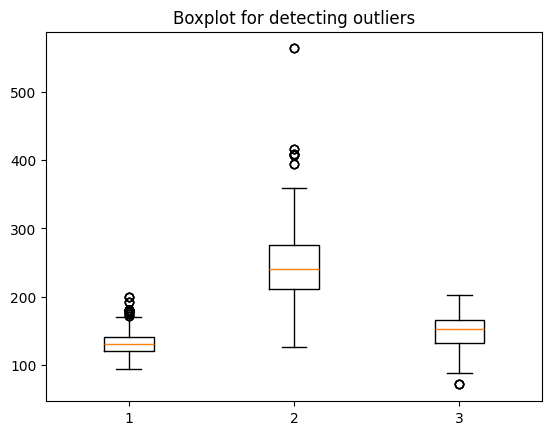

In [29]:
plt.boxplot(df[numerical])
plt.title("Boxplot for detecting outliers")
plt.show()


##### THere are no outliers in the dataset

#### Statistical description

In [30]:
df.dtypes

age           int64
sex           int64
cp           object
trestbps      int64
chol          int64
fbs           int64
restecg      object
thalach       int64
exang         int64
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [31]:
df.describe().round(3)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,54.434,0.696,131.612,246.000,0.149,149.114,0.337,1.072,0.754,0.513
std,9.072,0.460,17.517,51.593,0.357,23.006,0.473,1.175,1.031,0.500
min,29.000,0.000,94.000,126.000,0.000,71.000,0.000,0.000,0.000,0.000
25%,48.000,0.000,120.000,211.000,0.000,132.000,0.000,0.000,0.000,0.000
50%,56.000,1.000,130.000,240.000,0.000,152.000,0.000,0.800,0.000,1.000
75%,61.000,1.000,140.000,275.000,0.000,166.000,1.000,1.800,1.000,1.000
max,77.000,1.000,200.000,564.000,1.000,202.000,1.000,6.200,4.000,1.000


#### Categorical Encoding

In [32]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,typical_angina,125,212,0,ST-T wave abnormality,168,0,1.0,Down sloping,2,Reversible defect,0
1,53,1,typical_angina,140,203,1,Normal,155,1,3.1,Up sloping,0,Reversible defect,0
2,70,1,typical_angina,145,174,0,ST-T wave abnormality,125,1,2.6,Up sloping,0,Reversible defect,0
3,61,1,typical_angina,148,203,0,ST-T wave abnormality,161,0,0.0,Down sloping,1,Reversible defect,0
4,62,0,typical_angina,138,294,1,ST-T wave abnormality,106,0,1.9,Flat,3,Fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,atypical_angina,140,221,0,ST-T wave abnormality,164,1,0.0,Down sloping,0,Fixed defect,1
1021,60,1,typical_angina,125,258,0,Normal,141,1,2.8,Flat,1,Reversible defect,0
1022,47,1,typical_angina,110,275,0,Normal,118,1,1.0,Flat,1,Fixed defect,0
1023,50,0,typical_angina,110,254,0,Normal,159,0,0.0,Down sloping,0,Fixed defect,1


In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Spliting the dataset

In [34]:
X =df.drop(['target'],axis = 1)

In [35]:
y = df.target

In [36]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,typical_angina,125,212,0,ST-T wave abnormality,168,0,1.0,Down sloping,2,Reversible defect
1,53,1,typical_angina,140,203,1,Normal,155,1,3.1,Up sloping,0,Reversible defect
2,70,1,typical_angina,145,174,0,ST-T wave abnormality,125,1,2.6,Up sloping,0,Reversible defect
3,61,1,typical_angina,148,203,0,ST-T wave abnormality,161,0,0.0,Down sloping,1,Reversible defect
4,62,0,typical_angina,138,294,1,ST-T wave abnormality,106,0,1.9,Flat,3,Fixed defect


In [37]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [38]:
cat = ['cp','restecg','slope', 'thal' ]

In [39]:
num = ['age', 'sex','trestbps', 'chol', 'fbs','thalach',
       'exang', 'oldpeak','ca']

### Preprocessing

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
from sklearn.feature_extraction import DictVectorizer

In [43]:
dv = DictVectorizer(sparse = False)

In [44]:
train_dicts = x_train[cat + num].to_dict(orient = "records")
test_dicts = x_test[cat + num].to_dict(orient = "records")

In [45]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [46]:
train_encoded = dv.transform(train_dicts)
test_encoded = dv.transform(test_dicts)

In [47]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#### Convert to dataframe

In [48]:
train_enc_df = pd.DataFrame(train_encoded, columns=dv.get_feature_names_out())

#### Calculating mutual scores

In [49]:
mi_scores = mutual_info_classif(train_enc_df, y_train)
mi_scores = pd.Series(mi_scores, index=train_enc_df.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [50]:
mi_scores

chol                                    0.239871
thal=Fixed defect                       0.176970
thalach                                 0.155876
cp=typical_angina                       0.155219
oldpeak                                 0.145535
ca                                      0.140371
thal=Reversible defect                  0.123303
age                                     0.090282
exang                                   0.090231
slope=Down sloping                      0.087648
cp=atypical_angina                      0.077917
slope= Flat                             0.074669
cp=Non_anginal_pain                     0.040229
sex                                     0.037984
trestbps                                0.027776
restecg=Left ventricular hypertrophy    0.023109
slope=Up sloping                        0.017894
cp=Asymptomatic                         0.016242
restecg=Normal                          0.005082
restecg=ST-T wave abnormality           0.000000
thal=Normal         

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
from sklearn.model_selection import cross_val_score

for k in [5, 10, 15, 20]:
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_sel = selector.fit_transform(train_enc_df, y_train)
    
    scores = cross_val_score(GaussianNB(), X_train_sel, y_train, cv=5)
    print(f"k={k}, Accuracy={scores.mean():.4f}")


k=5, Accuracy=0.8280
k=10, Accuracy=0.8537
k=15, Accuracy=0.8293
k=20, Accuracy=0.8512


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Converting to dataframe for easy plotting

In [54]:
mi_df = mi_scores.reset_index()
mi_df.columns = ["Feature", "Mutual Information Score"]

In [56]:
mi_df

,Feature,Mutual Information Score
0,chol,0.239871
1,thal=Fixed defect,0.176970
2,thalach,0.155876
3,cp=typical_angina,0.155219
4,oldpeak,0.145535
5,ca,0.140371
6,thal=Reversible defect,0.123303
7,age,0.090282
8,exang,0.090231
9,slope=Down sloping,0.087648


C:\Users\ALGORITHM\AppData\Local\Temp\ipykernel_2408\3080318075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mutual Information Score", y="Feature", data=mi_df, palette="viridis")


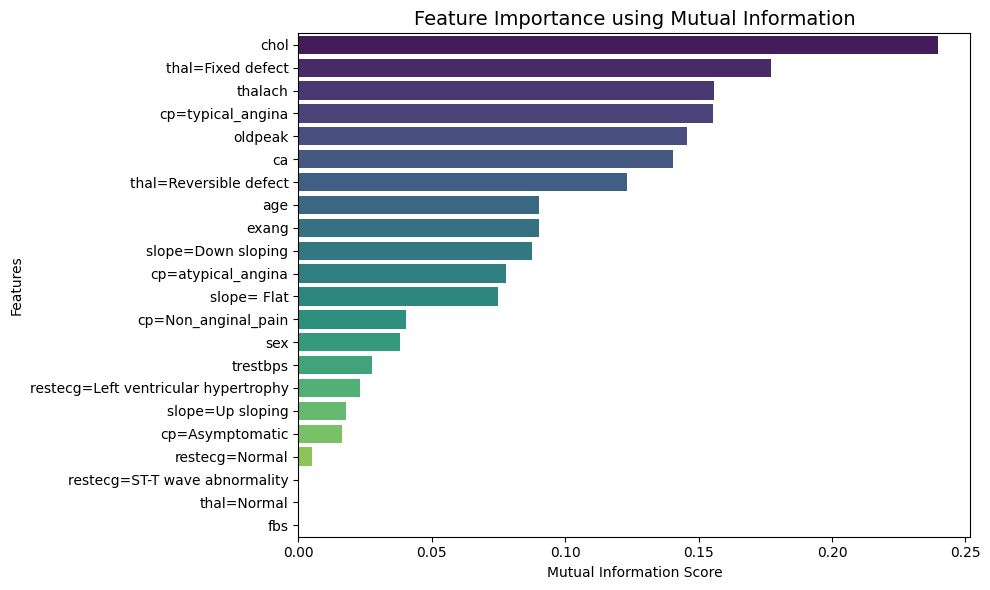

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x="Mutual Information Score", y="Feature", data=mi_df, palette="viridis")
plt.title("Feature Importance using Mutual Information", fontsize=14)
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("mutual_information_features.png", dpi=300, bbox_inches="tight") 
plt.savefig("mutual_information_features.pdf", dpi=300, bbox_inches="tight")  
plt.show()

### Top 10 features

In [58]:
print(mi_df.head(10))  

                  Feature  Mutual Information Score
0                    chol                  0.239871
1       thal=Fixed defect                  0.176970
2                 thalach                  0.155876
3       cp=typical_angina                  0.155219
4                 oldpeak                  0.145535
5                      ca                  0.140371
6  thal=Reversible defect                  0.123303
7                     age                  0.090282
8                   exang                  0.090231
9      slope=Down sloping                  0.087648


In [59]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_sel = selector.fit_transform(train_enc_df, y_train)

In [60]:
X_train_sel

array([[  3., 149.,   0., ...,   1.,   0., 126.],
       [  0., 325.,   0., ...,   1.,   0., 154.],
       [  0., 267.,   0., ...,   1.,   0., 167.],
       ...,
       [  0., 299.,   0., ...,   0.,   1., 173.],
       [  0., 211.,   0., ...,   0.,   1., 161.],
       [  1., 230.,   0., ...,   1.,   0., 160.]], shape=(820, 10))

In [61]:
X_test_sel = selector.transform(test_encoded)

C:\Users\ALGORITHM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


In [62]:
X_test_sel

array([[  0., 209.,   0., ...,   1.,   0., 163.],
       [  0., 216.,   0., ...,   1.,   0., 115.],
       [  1., 289.,   0., ...,   0.,   1., 145.],
       ...,
       [  0., 226.,   0., ...,   1.,   0., 169.],
       [  1., 207.,   0., ...,   0.,   1., 138.],
       [  1., 230.,   0., ...,   0.,   1., 165.]], shape=(205, 10))

In [63]:
model = GaussianNB()

In [64]:
model.fit(X_train_sel, y_train)

,priors,None
,var_smoothing,1e-09


In [65]:
pred = model.predict(X_test_sel)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix

In [67]:
accuracy = accuracy_score(y_test, pred)
print("accuaracy = ", accuracy)

accuaracy =  0.7853658536585366


In [68]:
precision = precision_score(y_test, pred)
print("precision_scores = ", precision)

precision_scores =  0.780952380952381


In [69]:
recall = recall_score(y_test, pred)
print("recall_scores = ", recall)

recall_scores =  0.7961165048543689


In [70]:
f1score = f1_score(y_test, pred)
print("f1_score", f1score)

f1_score 0.7884615384615384


In [71]:
confusionmatrix = confusion_matrix(y_test, pred)
confusionmatrix

array([[79, 23],
       [21, 82]])

In [72]:
y_probs =  model.predict_proba(X_test_sel)[:, 1]
roc = roc_auc_score(y_test, y_probs)
print('roc_auc_scores', roc)

roc_auc_scores 0.8337140681515325


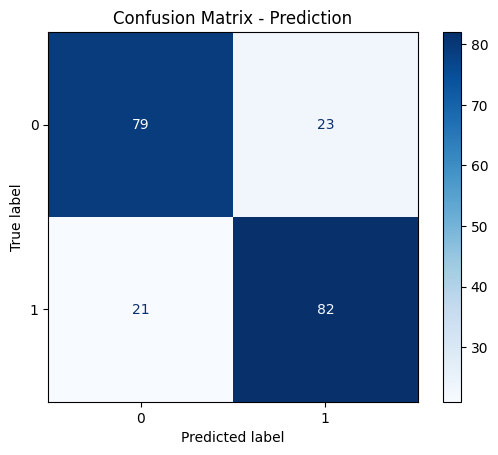

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

confusionmatrix = confusion_matrix(y_test, pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
display.plot(cmap='Blues')
plt.title("Confusion Matrix - Prediction")
plt.savefig("Confusion matrix.png", dpi=300, bbox_inches="tight")
plt.show()


In [74]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

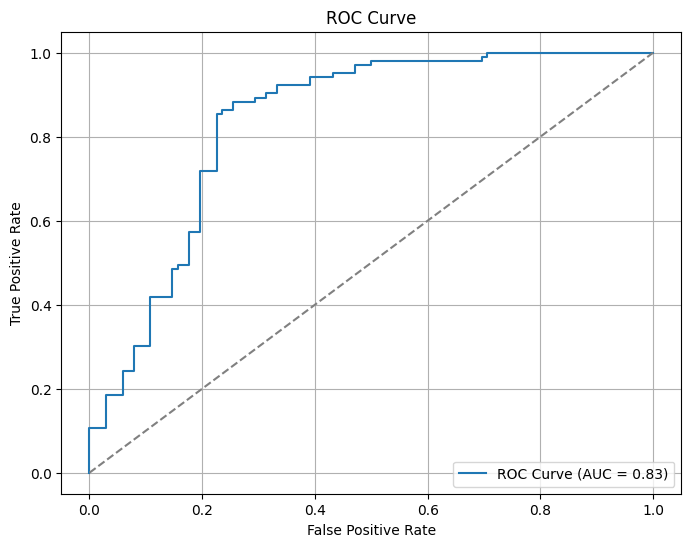

In [75]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [76]:
scores = pd.Series()
scores["accuracy"] = accuracy
scores['precision_scores'] = precision
scores['recall_score'] = recall
scores['f1_score']= f1score
scores['roc_auc_scores'] = roc

In [77]:
scores

accuracy            0.785366
precision_scores    0.780952
recall_score        0.796117
f1_score            0.788462
roc_auc_scores      0.833714
dtype: float64

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

In [ ]:
joblib.dump(dv, 'dv.pkl')

In [87]:
joblib.dump(selector, 'selector.pkl')

['selector.pkl']

In [89]:
import json

In [90]:
with open('features.json', 'w') as f:
    json.dump(cat + num, f)